In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
fuel_data = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv', na_values= {' ' : np.nan})

In [3]:
fuel_data.head(10)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.77,2.77,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922000,44.24,43.25,1.850
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260.0,0.064094,28.77,0.00,0.450
7,f1_fuel_1994_12_2_1_10,2,1994,resondent's portion,coal,ton,5372133.0,24.840000,58.54,55.13,2.360
8,f1_fuel_1994_12_2_2_10,2,1994,respondent's portion,coal,ton,817520.0,24.290000,33.97,34.65,1.400
9,f1_fuel_1994_12_4_0_1,4,1994,units 1-3,coal,ton,1471233.0,22.484000,28.73,28.11,1.278


In [4]:
fuel_data.describe(include= 'all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1994_12_193_0_6,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [5]:
len(fuel_data)

29523

In [6]:
fuel_data.shape

(29523, 11)

In [7]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [8]:
# Percentage of missing values in fuel_unit
fuel_data['fuel_unit'].isnull().value_counts()/len(fuel_data)

False    0.993903
True     0.006097
Name: fuel_unit, dtype: float64

The percentage of missing values in fuel_unit is less than 1%, so I will keep it and fill in the missing values with the mode.

In [9]:
fuel_data['fuel_unit'].value_counts()/len(fuel_data)

mcf       0.384582
ton       0.303424
bbl       0.270907
gramsU    0.015717
mmbtu     0.006097
kgU       0.003726
mwhth     0.003387
mwdth     0.003218
gal       0.002845
Name: fuel_unit, dtype: float64

mcf is the mode of the values in fuel_unit

In [10]:
fuel_data['fuel_unit'].fillna(fuel_data['fuel_unit'].mode()[0], inplace = True)

In [11]:
#re-check for missing values
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

All columns are filled 

In [12]:
fuel_data.groupby('report_year')['report_year'].count()

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [13]:
fuel_data.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [14]:
fuel_data.duplicated().any()

False

In [15]:
fuel_data.corr(method= 'pearson')

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


There are no strong positive or negative correlations between any of the columns.

In [16]:
fuel_data.skew(axis= 0, skipna= True)

utility_id_ferc1                  0.605070
report_year                       0.006953
fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

In [17]:
fuel_data.skew(axis= 1, skipna= True)

0        2.645751
1        2.645751
2        2.645749
3        2.645750
4        2.632823
           ...   
29518    2.585605
29519    2.645718
29520    2.643757
29521    2.645533
29522    2.579144
Length: 29523, dtype: float64

A positive skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution.

Kurtosis is one of the two measures that quantify shape of a distribution, kurtosis determine the volume of the outlier
Kurtosis describes the peakedness of the distribution.

In [18]:
fuel_data.kurt(axis= 1)

0        6.999997
1        6.999999
2        6.999990
3        6.999994
4        6.945907
           ...   
29518    6.737906
29519    6.999864
29520    6.991838
29521    6.999116
29522    6.708633
Length: 29523, dtype: float64

In [19]:
fuel_data.kurt(axis= 0)

utility_id_ferc1                    1.088432
report_year                        -1.145656
fuel_qty_burned                   651.369450
fuel_mmbtu_per_unit                55.595695
fuel_cost_per_unit_burned         485.255851
fuel_cost_per_unit_delivered    11765.054226
fuel_cost_per_mmbtu             29489.132594
dtype: float64

UNIVARIATE ANALYSIS

In [27]:
#checking the data types
fuel_data.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [28]:
#dropping irrelevant columns.
fuel_data= fuel_data.drop(columns= ['record_id', 'utility_id_ferc1', 'plant_name_ferc1'])

In [29]:
fuel_data.head(10)

,report_year,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1994,coal,ton,5377489.0,16.590000,18.59,18.53,1.121
1,1994,coal,ton,10486945.0,16.592000,18.58,18.53,1.120
2,1994,coal,ton,2978683.0,24.130000,39.72,38.12,1.650
3,1994,coal,ton,3739484.0,23.950000,47.21,45.99,1.970
4,1994,gas,mcf,40533.0,1.000000,2.77,2.77,2.570
5,1994,coal,ton,2124933.0,23.922000,44.24,43.25,1.850
6,1994,nuclear,kgU,2260.0,0.064094,28.77,0.00,0.450
7,1994,coal,ton,5372133.0,24.840000,58.54,55.13,2.360
8,1994,coal,ton,817520.0,24.290000,33.97,34.65,1.400
9,1994,coal,ton,1471233.0,22.484000,28.73,28.11,1.278


In [30]:
#renaming the columns names
fuel_data= fuel_data.rename(columns= {'report_year': 'year', 'fuel_type_code_pud1': 'type', 'fuel_unit': 'unit', 'fuel_qty_burned': 'qty_burned', 'fuel_mmbtu_per_unit': 'energy_measure_per_unit', 'fuel_cost_per_unit_burned': 'cost_per_unit_burned', 'fuel_cost_per_unit_delivered': 'cost_per_unit_delivered', 'fuel_cost_per_mmbtu': 'cost_per_mmbtu'})

In [31]:
fuel_data.head(5)

,year,fuel_type_code_pudl,unit,qty_burned,energy_measure_per_unit,cost_per_unit_burned,cost_per_unit_delivered,cost_per_mmbtu
0,1994,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,1994,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,1994,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,1994,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,1994,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [33]:
#detecting outliers
Q1 = fuel_data.quantile(0.25)
Q3 = fuel_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year                       1.200000e+01
qty_burned                 1.410217e+06
energy_measure_per_unit    1.598200e+01
cost_per_unit_burned       4.190600e+01
cost_per_unit_delivered    3.835850e+01
cost_per_mmbtu             5.805000e+00
dtype: float64


In [35]:
fuel_data = fuel_data[~((fuel_data < (Q1-1.5 * IQR)) |(fuel_data > (Q3 + 1.5 * IQR))).any(axis=1)]
fuel_data.shape

(22274, 8)

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

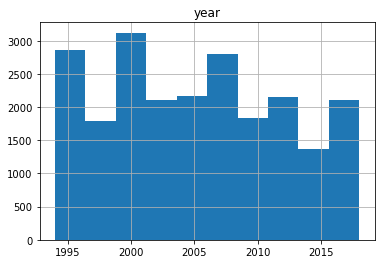

In [45]:
fuel_data.hist(column= 'year')

<AxesSubplot:xlabel='fuel_type_code_pudl', ylabel='count'>

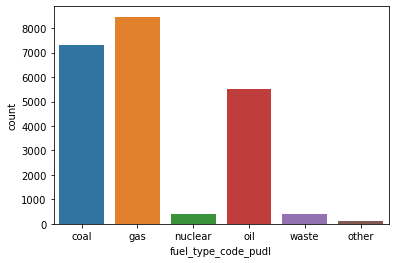

In [40]:
sns.countplot(x= 'fuel_type_code_pudl', data= fuel_data)

The most used fuel type is Gas at almost 12000,followed by coal and oil which have slight difference in quantity. Nuclear and waste appear minimal and other source of fuel the lowest. 

<AxesSubplot:xlabel='unit', ylabel='count'>

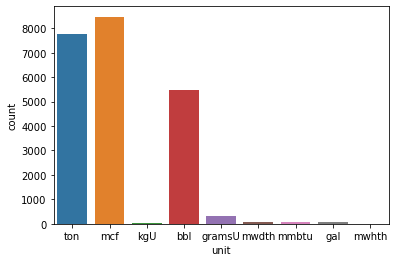

In [47]:
sns.countplot(x= 'unit', data= fuel_data)

The most occurring fuel_unit is mcf at above 8000, followed by ton at a little below 8000 and bbl at almost 6000. The rest are minimal.

array([[<AxesSubplot:title={'center':'qty_burned'}>]], dtype=object)

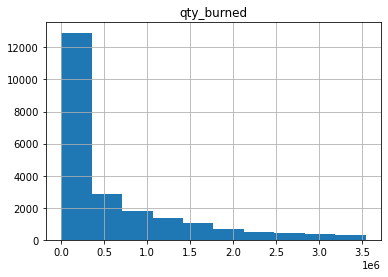

In [48]:
fuel_data.hist(column= 'qty_burned')

array([[<AxesSubplot:title={'center':'energy_measure_per_unit'}>]],
      dtype=object)

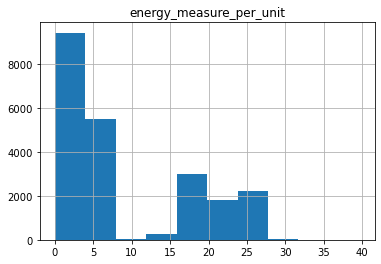

In [49]:
fuel_data.hist(column= 'energy_measure_per_unit')

array([[<AxesSubplot:title={'center':'cost_per_unit_burned'}>]],
      dtype=object)

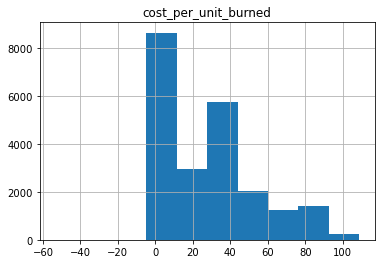

In [50]:
fuel_data.hist(column= 'cost_per_unit_burned')

array([[<AxesSubplot:title={'center':'cost_per_unit_delivered'}>]],
      dtype=object)

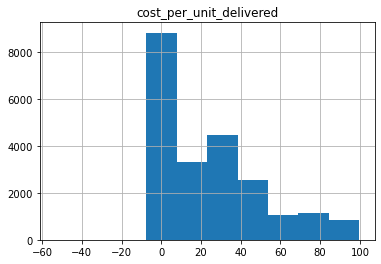

In [52]:
fuel_data.hist(column= 'cost_per_unit_delivered')

array([[<AxesSubplot:title={'center':'cost_per_mmbtu'}>]], dtype=object)

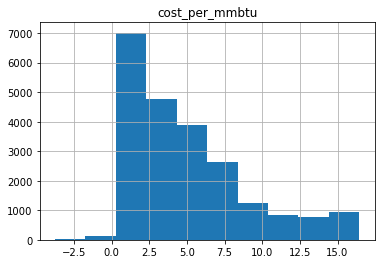

In [53]:
fuel_data.hist(column= 'cost_per_mmbtu')

<AxesSubplot:>

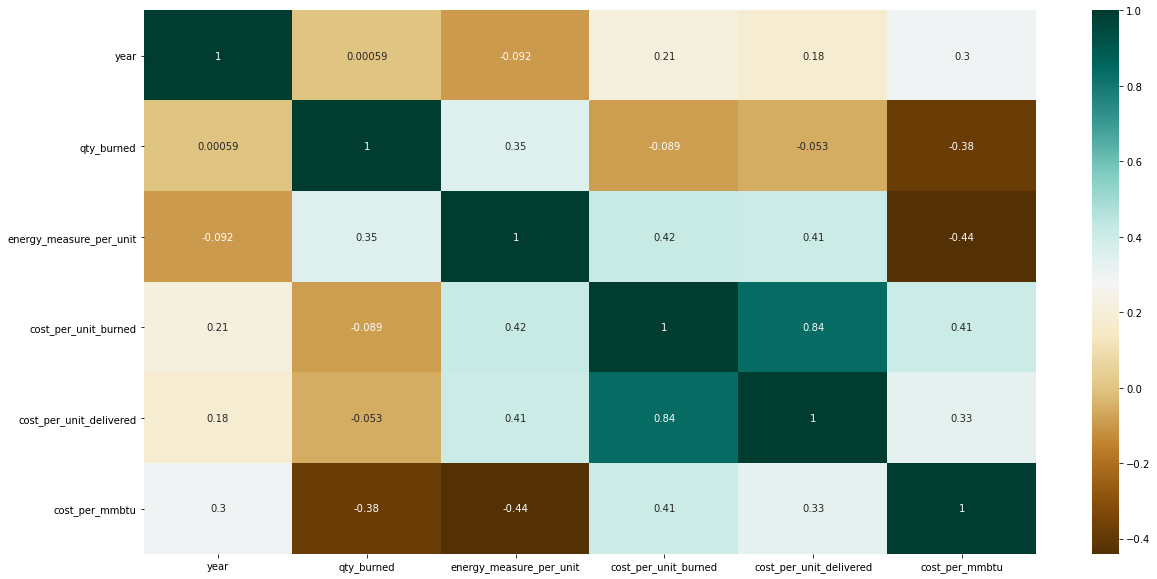

In [54]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= fuel_data.corr()
sns.heatmap(c,cmap= "BrBG", annot=True)

There is no shown strong positive or negative correlation amongst the columns.

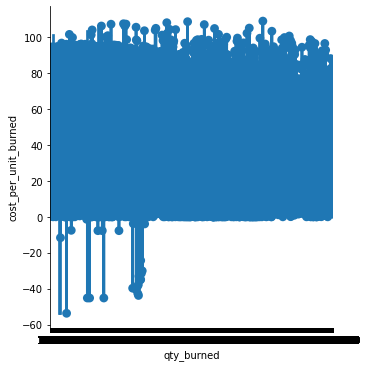